## Data visualization using grammar of graphics

(Presented in code review on November 12,2021)

### Premise: 

- You have some data in some format (.csv, .fits, etc)

- Want to visualize the data in order to infer something useful out it (i.e Human readable form)
- How to do this effectively in python?
    - Matplotlib
        - Advantage: Highly tested code
        - Downside: Can get verbose and large
    - Plotnine
        - Built on matplotlib 
        - results in 'better structured', 'readable',  code

### Motor Trend Car Road Tests dataset
We will use the Motor Trend Car Road Tests dataset for this notebook
(https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

#### Description of data:

[0]   mpg     Miles/(US) gallon

[1]   cyl     Number of cylinders

[2]   disp    Displacement (cu.in.)

[3]   hp      Gross horsepower

[4]   drat    Rear axle ratio

[5]   wt      Weight (1000 lbs)

[6]   qsec    1/4 mile time

[7]   vs      Engine (0 = V-shaped, 1 = straight)

[8]   am      Transmission (0 = automatic, 1 = manual)

[9]   gear    Number of forward gears

[10]  carb    Number of carburetors 


In [43]:
import matplotlib.pyplot as plt
from plotnine import *
import numpy as np

In [76]:
from plotnine.data import mtcars

## mtcars is a pandas dataframe that containing the Motor Trend Car Road Tests
## To access one of the columns in this dataframe you can do x = mtcars['mpg']


mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Text(0, 0.5, 'Horse Power')

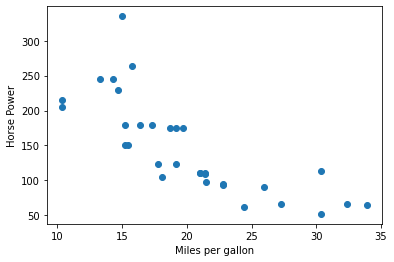

In [77]:
## Starting off with the matplotlib way

plt.figure()

## Scatter plot the quantities mpg and hp
plt.scatter(
    mtcars['mpg'],
    mtcars['hp']
) 
plt.xlabel("Miles per gallon")
plt.ylabel("Horse Power")



## Grammar of Graphics approach 

- Used in 'R' (called ggplot2)
- Philosophy: Plot in layers 

#### Layers 
I : Data 

Which dataset would you be using?

II : Aesthetics 

Which columns in the dataset need to be plotted (e.g, plot x v/s y or x v/s z)

III: Geometric objects

What to do with these columns

## Basic examples

In [78]:
#Basics 
p = (

    #Code goes in here
    
    
   ### Layer- 1 : Data  ###
    
   ### Layer- 2 : Aesthetics ###
    
   ### Layer- 3 : What to do with the data ### 
)

### 1. Scatter Plot

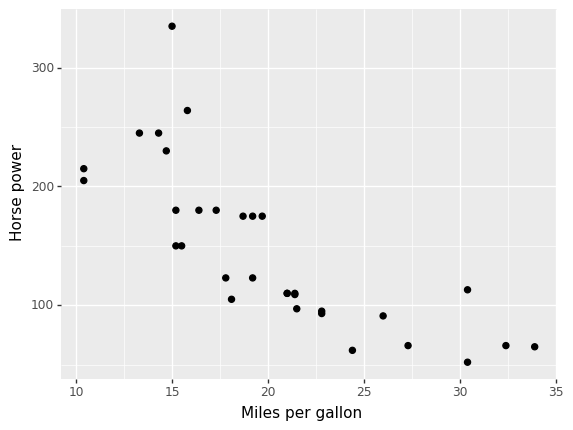

<bound method ggplot.draw of <ggplot: (8757028779346)>>

In [79]:
p = (
    ### Layer- 1 : Data  ###
    ### Dataset: motor trends ##    

    ggplot(
        mtcars
    )
    
    
    ### Layer- 2 : Aesthetics ###
    + aes(
            x='mpg', 
            y='hp'        
    )
    
    
    ### Layer- 3 : What to do with the data ###
    
    # Plot x and y as geometric points
    + geom_point(
        color='black',     # set line colour
        size=2,            # set line thickness
               )
    
    
    # Add some labels
    + labs(x='Miles per gallon', y='Horse power')
)

p.draw

## 2. Line plot

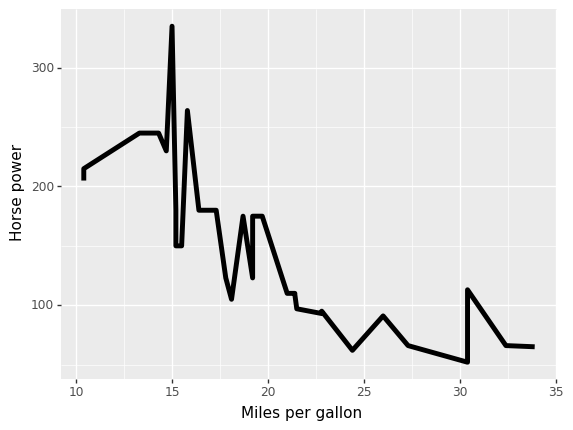

<bound method ggplot.draw of <ggplot: (8757028894895)>>

In [80]:
p = (
    ### Layer- 1 : Data  ###
    ggplot(
        mtcars
    )
    
    
    ### Layer- 2 : Aesthetics ###
    + aes(
            x='mpg', 
            y='hp'        
    )
    
    
    ### Layer- 3 : What to do with the data ###
    
    # Plot x and y as a geometric line
    + geom_line(
        color='black',     # set line colour
        size=2,            # set line thickness
               )
    
    
    # Add some labels
    + labs(x='Miles per gallon', y='Horse power')
)
p.draw

## 3. Scatter plot with smoothed data overlay 

/home/keerthi/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


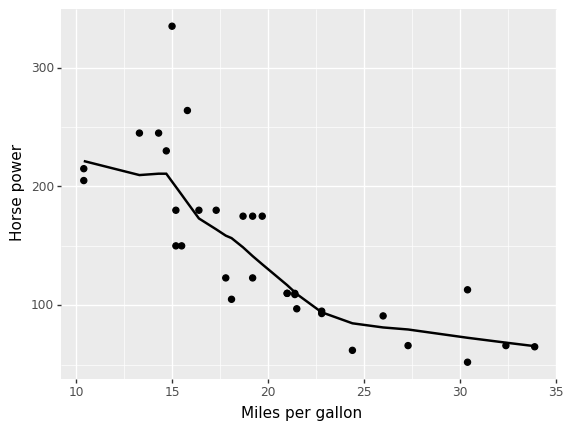

<bound method ggplot.draw of <ggplot: (8757029151588)>>

In [88]:

p = (
    ### Layer- 1 : Data  ###
    ggplot(
        mtcars
    )
    
    
    ### Layer- 2 : Aesthetics ###
    + aes(
            x='mpg', 
            y='hp'        
    )
    
    
    ### Layer- 3 : What to do with the data ###
    
    # Plot x and y as geometric points
    + geom_point(
        color='black',     # set line colour
        size=2,            # set line thickness
               )
    
    # Overlay a smoothed version of dataset. 
    # Span: [0,1] change span to see its effects
    + geom_smooth(span=0.5)    
    
    
    # Add some labels
    + labs(x='Miles per gallon', y='Horse power')
)
p.draw

## 4. Scatter plot with data colored by number of cylinders in car

/home/keerthi/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


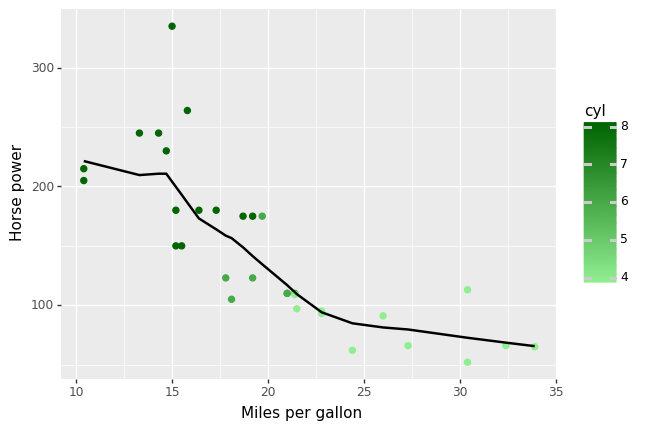

<bound method ggplot.draw of <ggplot: (8757029614315)>>

In [19]:
## Scatter plot with data colored by number of cylinders in car ##

p = (
    ### Layer- 1 : Data  ###
    ggplot(
        mtcars
    )
    
    
    ### Layer- 2 : Aesthetics ###
    + aes(
            x='mpg', 
            y='hp',
            color='cyl'
    )
    
    
    ### Layer- 3 : What to do with the data ###
    
    # Plot x and y as geometric points
    + geom_point(
        size=2,            # set line thickness
               )
    
    # Overlay a smoothed version of dataset. 
    # Span: [0,1] change span to see its effects
    + geom_smooth(span=0.5)    
    
    # Choose colormap or make your own
    + scale_color_gradient(low="lightgreen",high="darkgreen")
    
    
    # Add some labels
    + labs(x='Miles per gallon', y='Horse power')
)

p.draw

## 5. Scatter plot with data colored by number of cylinders in car

/home/keerthi/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


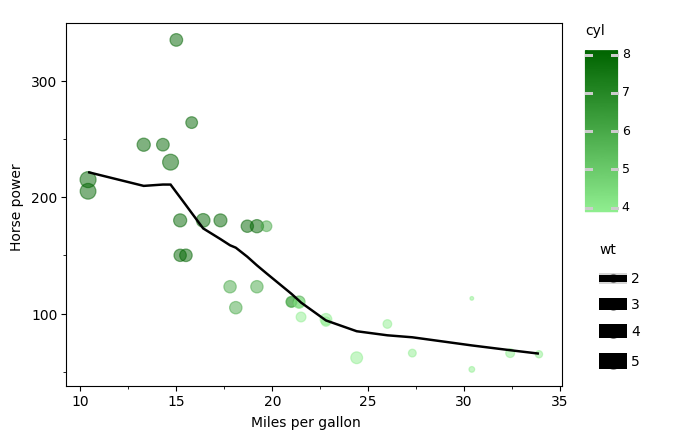

<bound method ggplot.draw of <ggplot: (8757028702142)>>

In [89]:
p = (
    ### Layer- 1 : Data  ###
    ggplot(
        mtcars
    )
    
    
    ### Layer- 2 : Aesthetics ###
    + aes(
            x='mpg', 
            y='hp',
            color='cyl',
            size = 'wt'
    )
    
    
    ### Layer- 3 : What to do with the data ###
    
    # Plot x and y as geometric points
    + geom_point(
        alpha=0.5
    )
    
    # Overlay a smoothed version of dataset. 
    # Span: [0,1] change span to see its effects
    + geom_smooth(span=0.5)    
    
    # Choose colormap or make your own
    + scale_color_gradient(low="lightgreen",high="darkgreen")
    
    # Add some labels
    + labs(x='Miles per gallon', y='Horse power')
    
    # Choose theme
        + theme_matplotlib()
)

p.draw

## 6. Histogram

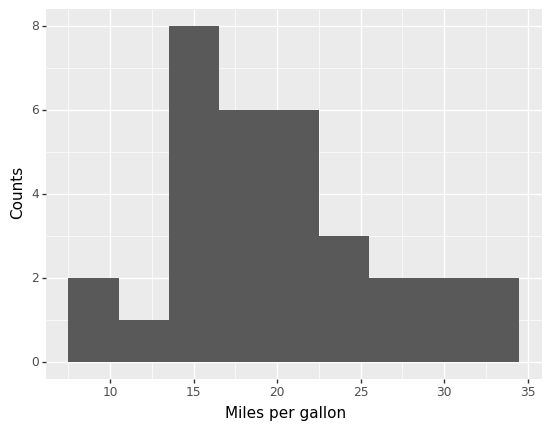

<bound method ggplot.draw of <ggplot: (8757034892807)>>

In [90]:
## Histogram ##

p = (
    ### Layer- 1 : Data  ###
    ggplot(
        mtcars
    )
    
    
    ### Layer- 2 : Aesthetics ###
    + aes(
            x='mpg',        
    )
    
    
    ### Layer- 3 : What to do with the data ###
    
    # Plot x and y as geometric points
    + geom_histogram(binwidth=3)
    
    
    # Add some labels
    + labs(x='Miles per gallon', y='Counts')
)

p.draw

## 7. Scatter plot with errorbars

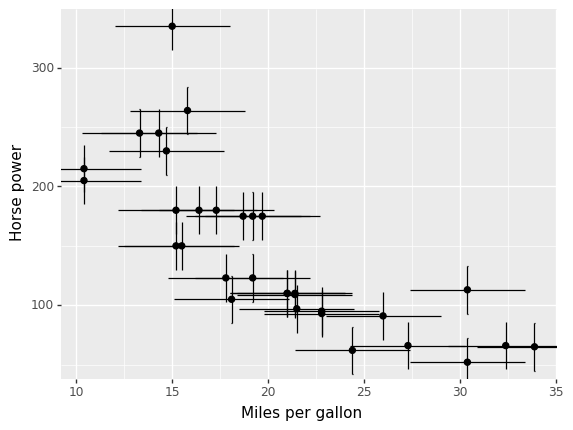

<bound method ggplot.draw of <ggplot: (8757029307426)>>

In [91]:
## Scatter plot with errorbars ##

## sample errorbar
err = np.ones(len(mtcars['hp']))*20
err_x = np.ones(len(mtcars['hp']))*3

p = (
    ### Layer- 1 : Data  ###
    ggplot(
        mtcars
    )
    
    
    ### Layer- 2 : Aesthetics ###
    + aes(
            x='mpg', 
            y='hp'        
    )
    
    
    ### Layer- 3 : What to do with the data ###
    
    # Plot x and y as geometric points
    + geom_point(
        color='black',     # set line colour
        size=2,            # set line thickness
               )
    # Vertical errorbar. 
    + geom_errorbar(
            ymin = mtcars['hp']-err,
            ymax = mtcars['hp']+err,
            width = 0.02
    )
    # Horizontal errorbar
    + geom_errorbarh(
            xmin = mtcars['mpg']-err_x,
            xmax = mtcars['mpg']+err_x,
            height = 0.001
    )       
    
    
    
    # Add some labels
    + labs(x='Miles per gallon', y='Horse power')
)

p.draw

# Intermediate examples

## 8.0 Intro to pandas query

What if you don't want to plot the entire dataset?

In [83]:
mtcars.query("am == 0")

## returns columns which have only am==0


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


In [84]:
mtcars.query("am == 0 & gear == 4")

## returns columns which have only am=0 and gear = 4

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
7,Merc 240D,24.4,4,146.7,62,3.69,3.19,20.0,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4
10,Merc 280C,17.8,6,167.6,123,3.92,3.44,18.9,1,0,4,4


### 8.1 Example -1 of pandas query with plotnine

Query the dataframe for columns with am = 0 and only plot those

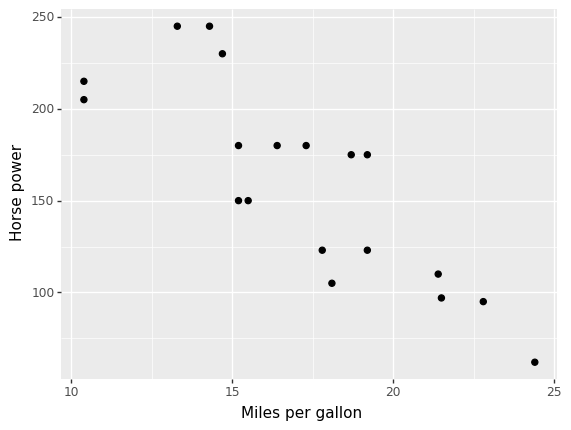

<bound method ggplot.draw of <ggplot: (8757029004111)>>

In [87]:
## Scatter plot ##

p = (
    ### Layer- 1 : Data  ###
    ### Dataset: motor trends ##    

    ggplot(
       mtcars.query("am == 0")

    )
    
    
    ### Layer- 2 : Aesthetics ###
    + aes(
            x='mpg', 
            y='hp'        
    )
    
    
    ### Layer- 3 : What to do with the data ###
    
    # Plot x and y as geometric points
    + geom_point(
        color='black',     # set line colour
        size=2,            # set line thickness
               )
    
    
    # Add some labels
    + labs(x='Miles per gallon', y='Horse power')
)

p.draw

### 8.2 Example -2 of pandas query with plotnine



/home/keerthi/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


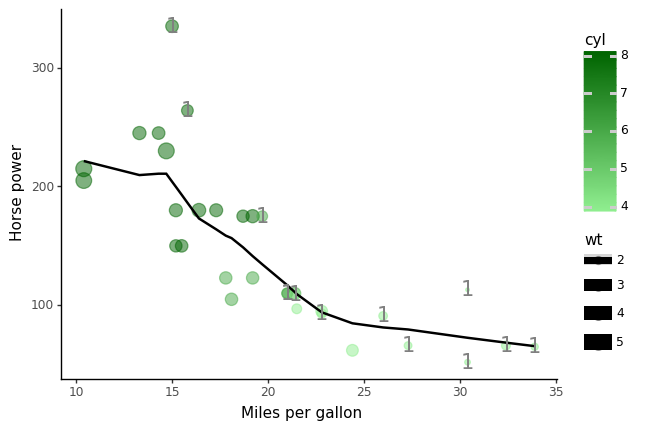

<bound method ggplot.draw of <ggplot: (8757028956883)>>

In [85]:
## Using the query method example:
## The following adds a text annotation marking all cars which have manual transimission
p = (
    ### Layer- 1 : Data  ###
    ggplot(
        mtcars
    )
    
    
    ### Layer- 2 : Aesthetics ###
    + aes(
            x='mpg',  #mtcars.query('mpg>10')
            y='hp',
            color='cyl',
            size = 'wt',
            label ='am'
    )
    
    
    ### Layer- 3 : What to do with the data ###
    
    # Plot x and y as geometric points
    + geom_point(
        alpha=0.5
    )
    
    # Overlay a smoothed version of dataset. 
    # Span: [0,1] change span to see its effects
    + geom_smooth(span=0.5)  
    
    # 
    + geom_text(
            color="grey",
            size= 15,
            data=mtcars.query("am==1"))

    
    
    # Choose colormap or make your own
    + scale_color_gradient(low="lightgreen",high="darkgreen")
    
    # Add some labels
    + labs(x='Miles per gallon', y='Horse power')
    
    # Choose theme
        + theme_classic()
)

p.draw

## 9.0 Using after_stat

In [65]:
import pandas as pd
df = pd.DataFrame({
    'var1': [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]
})


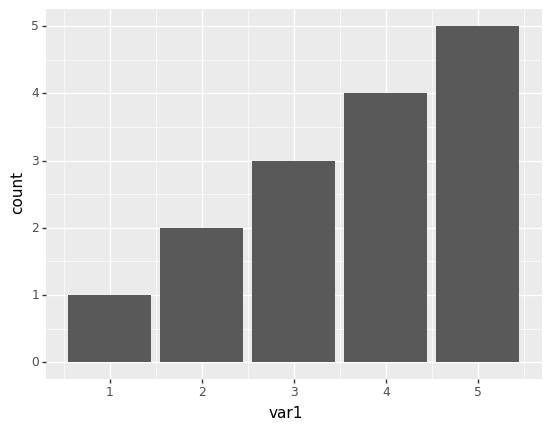

<ggplot: (8757027575215)>

In [66]:
## Notice that y axis is Counts but we can do other stuff too!
(ggplot(df, aes('var1'))
 + geom_bar()
)


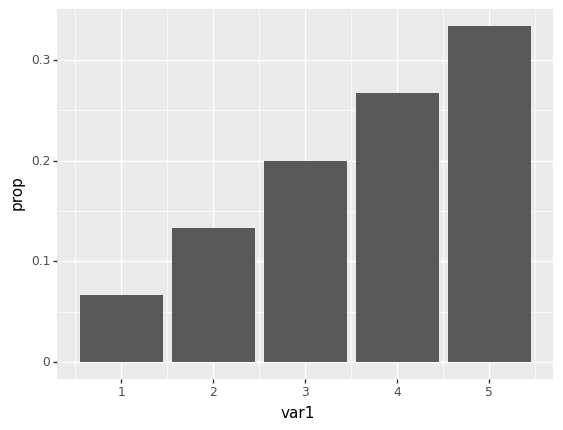

<ggplot: (8757027465189)>

In [67]:
# after_stat('prop'): Ratio of points 
(ggplot(df, aes('var1'))
 + geom_bar(aes(y=after_stat('prop'))) # default is after_stat('count')
)

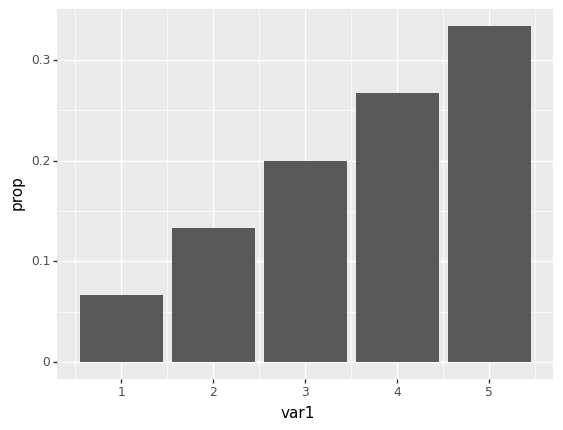

<ggplot: (8757027429726)>

In [68]:
## Custom calculations

(ggplot(df, aes('var1'))
 + geom_bar(aes(y=after_stat('count / np.sum(count)')))
 + labs(y='prop')
)

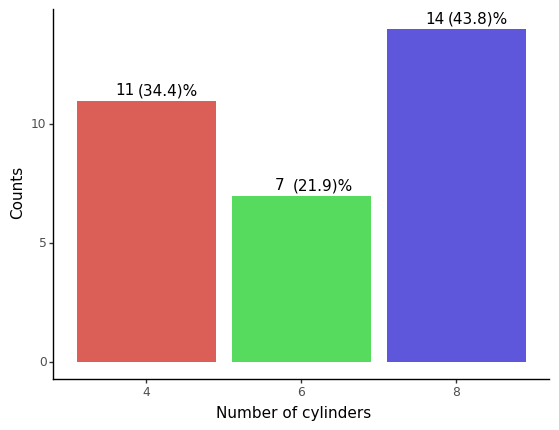

<bound method ggplot.draw of <ggplot: (8757028697128)>>

In [63]:
# Example from https://github.com/joaopcnogueira/plotnine-examples/blob/main/Plotnine%2001%20-%20Counts%20and%20Bar%20Plots.ipynb
# Operations on the dataset on the go

p= (
    #Layer 1
    ggplot(mtcars)
    #Layer 2 
    + aes(
        x='factor(cyl)', 
        fill='factor(cyl)'
    )
    
    #Layer 3
    + geom_bar()
    + geom_text(
        aes(label=after_stat('count')),
        stat='count',
        nudge_x=-0.14,
        nudge_y=0.125,
        va='bottom'
    )
    
    + geom_text(
        aes(label=after_stat('prop*100'), group=1),
        stat='count',
        nudge_x=0.14,
        nudge_y=0.125,
        va='bottom',
        format_string='({:.1f})%'
    )
    + labs(x='Number of cylinders', y='Counts')
    + scale_fill_discrete(guide=False)
    + theme_classic()
)

p.draw


## 10. Making the periodic table using geom_tile in plotnine



https://github.com/has2k1/plotnine-examples/blob/master/plotnine_examples/examples/geom_tile.ipynb

## 11. Animations (better than matplotlib?)

In [99]:
## Simple animation -1 

from plotnine.animation import PlotnineAnimation

# for animation in the notebook
from matplotlib import rc
rc('animation', html='html5')

def plot(k):
    p = (
    ### Layer- 1 : Data  ###
    ### Dataset: motor trends ##    

    ggplot(
        mtcars
    )
    
    
    ### Layer- 2 : Aesthetics ###
    + aes(
            x=mtcars['mpg']+0.1*k, 
            xmin=0,
            y='hp'     
        
    )
    
    
    ### Layer- 3 : What to do with the data ###
    
    # Plot x and y as geometric points
    + geom_point(
        color='black',     # set line colour
        size=2,            # set line thickness
               )
    
    
    # Add some labels
    + labs(x='Miles per gallon', y='Horse power')
    )
    return p



kmin = 1
kmax = 25
num_frames = 25

plots = (plot(k) for k in np.linspace(kmin, kmax, num_frames))
ani = PlotnineAnimation(plots, interval=100, repeat_delay=500)
ani.save('/home/keerthi/animation.mp4')
ani

In [113]:
## Simple animation -2

def plot(k):
    p=(
        ggplot()
        +aes(x=[-1,0,1],y=[0,0,0])
        +geom_point(size=2*k,alpha=1-k/kmax)
        +theme_classic()
    )
    return(p)



kmin = 1
kmax = 25
num_frames = 25

plots = (plot(k) for k in np.linspace(kmin, kmax, num_frames))
ani = PlotnineAnimation(plots, interval=100, repeat_delay=500)
# ani.save('/home/keerthi/animation.mp4')
ani

In [75]:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.animation.PlotnineAnimation.html#plotnine.animation.PlotnineAnimation

import pandas as pd
import numpy as np
from plotnine import *
from plotnine.animation import PlotnineAnimation

# for animation in the notebook
from matplotlib import rc
rc('animation', html='html5')
# Parameters used to control the spiral
n = 100
tightness = 1.3
kmin = 1
kmax = 25
num_frames = 25
theta = np.linspace(-np.pi, np.pi, n)

def plot(k):
    # For every plot we change the theta
    _theta = theta*k

    # Polar Equation of each spiral
    r = tightness*_theta

    df = pd.DataFrame({
        'theta': _theta,
        'r': r,
        'x': r*np.sin(_theta),
        'y': r*np.cos(_theta)
    })

    p = (ggplot(df)
         + geom_path(aes('x', 'y', color='theta'), size=1)
         + lims(
             # All the plots have scales with the same limits
             x=(-130, 130),
             y=(-130, 130),
             color=(-kmax*np.pi, kmax*np.pi)
         )
         + theme_void()
         + theme(
             aspect_ratio=1,
             # Make room on the right for the legend
             subplots_adjust={'right': 0.85}
         )
    )
    return p

# It is better to use a generator instead of a list
plots = (plot(k) for k in np.linspace(kmin, kmax, num_frames))
ani = PlotnineAnimation(plots, interval=100, repeat_delay=500)
# ani.save('/tmp/animation.mp4')
ani


## References:

Docs: https://plotnine.readthedocs.io/en/stable/api.html

Official documentation notebooks: https://github.com/has2k1/plotnine-examples/tree/master/plotnine_examples/examples

https://www.youtube.com/watch?v=cEQRIL1Z69M&list=LL&index=19



